In [372]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [373]:
# import data visualisation tools
import matplotlib.pyplot as plt
from matplotlib import pylab
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns

In [375]:
# import and view first 10 items of file
url = "/Users/arpanganguli/Documents/Finance/ISLR/Datasets/Auto.csv"
Auto = pd.read_csv(url)

In [376]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [377]:
list(Auto)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin',
 'name']

In [378]:
Auto = Auto.drop(Auto.index[[32, 126, 330, 336, 354]]) # removing rows containing "?". This is the easy way out. Such missing values need to be explored first in a real life situation.

In [379]:
# run regression (I am not visualising the data for the sake of brevity. But it is highly recommended as first step afer importing data)
Y = Auto.mpg.astype(float)
X = Auto.horsepower.astype(float)
model = ols("Y ~ X", data = Auto).fit()

In [380]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           7.03e-81
Time:                        23:21:23   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
X             -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [381]:
values = slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

In [382]:
X1 = Auto[['horsepower']]
Y1 = Auto['mpg']
lm = LinearRegression().fit(X1, Y1)

In [383]:
lm.coef_

array([-0.15784473])

In [384]:
print("Coefficients: ", lm.coef_)
print("Intercepts: ", lm.intercept_)
Y2 = [[98]]
predictions = lm.predict(Y2)

Coefficients:  [-0.15784473]
Intercepts:  39.93586102117047


In [387]:
print("Predicted value at X = 98: ", predictions)

Predicted value at X = 98:  [24.46707715]


<Figure size 1800x720 with 0 Axes>

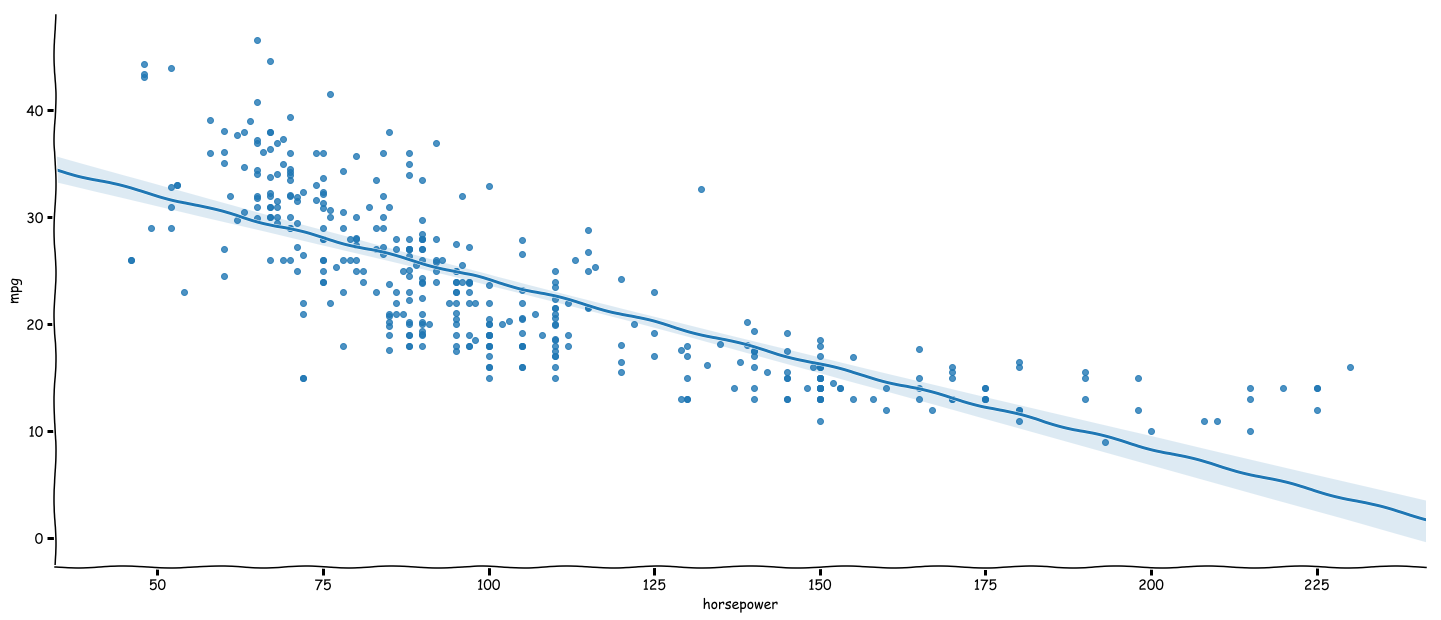

In [393]:
# plot relationships
plt.xkcd()
plt.figure(figsize=(25, 10))
plotdata = pd.concat([X, Y], axis = 1)
sns.lmplot(x = "horsepower", y = "mpg", data = plotdata)
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.show()

**a.i. Given the F-Statistic > 1 and p-value of that F-Statistic is close to 0 (and << 0.005), there is a statistically significant
   relationship between mpg and horespower.**

**a.ii. To determine the strength of the relationship between the predictor (horsepower) and response (mpg), we need to calculate the ratio of the RSE of the predictor (as determined by the model) and the mean of the response, since it would show how strongly it actually predicts the true values of the response. (Another way would be to show R^2 since it would determine how much the regressed model actually explains the true values of the response). The RSE is 4.905757 and the mean of mpg is 23.445918, which means the percentage error is 20.923714%. The R^2 value is 0.795 or 79.5%.**

**a.iii. Negative relationship. An increase in horsepower is related to a decrease in mpg.**

**a.iv. 24.46707715**